In [2]:
import numpy as np
from lattice import Lattice2D, BrickwallLatticeGeometry, RectangularLatticeGeometry, SimulationParameters, SimulationData, HexagonalLatticeGeometry
import matplotlib.pyplot as plt

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.05.


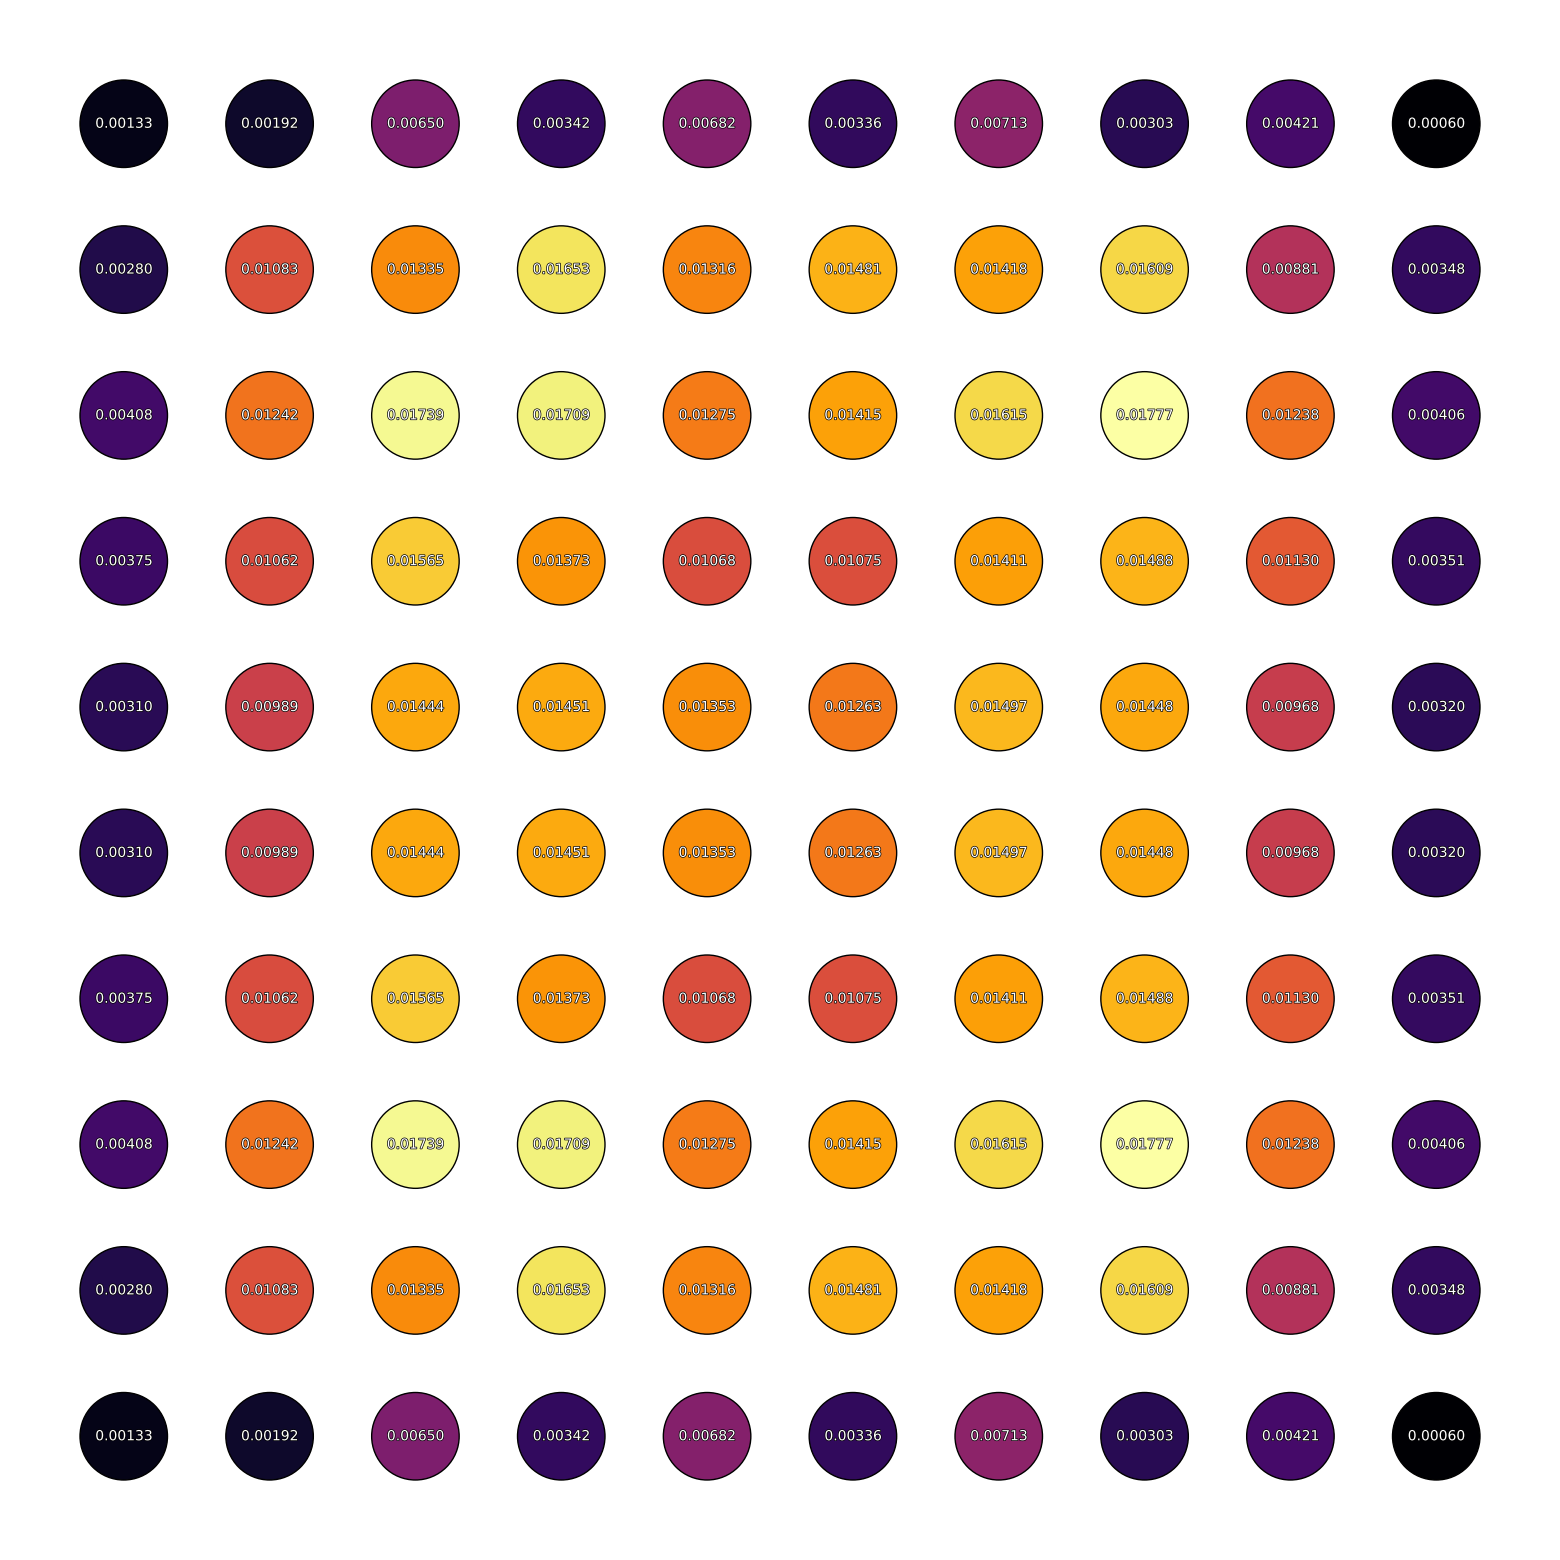

<Axes: >

In [238]:
from lattice import plot_site_grid
l = Lattice2D(BrickwallLatticeGeometry((10, 10)), SimulationParameters(-1, 1, np.array([0, -1]), 0.1, 10, 1, 1, 0.05))

plot_site_grid(l.density_matrix.diagonal(), l.geometry)

In [228]:
l.evolve(solver='rk4')

100%|██████████| 100/100 [00:00<00:00, 1025.51it/s]


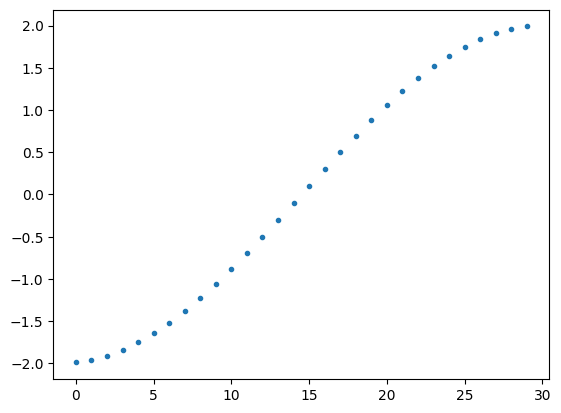

In [173]:
plt.plot(l.eigen_energies, '.')

In [91]:
l.eigen_energies

array([-1.61803399, -0.61803399,  0.61803399,  1.61803399])

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


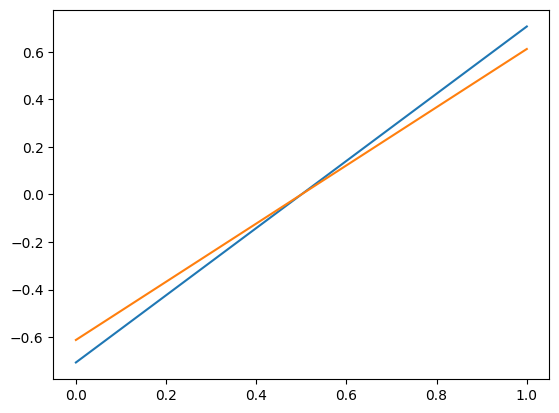

-0.7071067811865475 0.7071067811865475 0.7071067811865475
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.67.


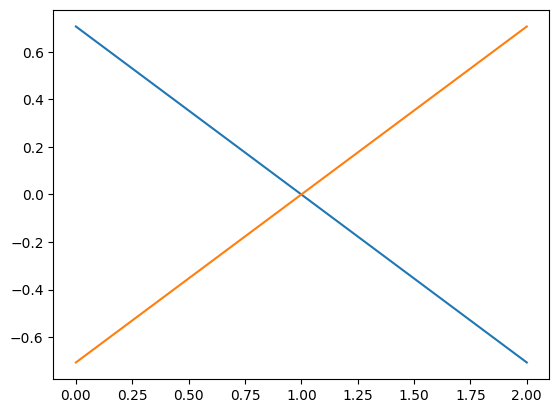

0.7071067811865476 0.7071067811865468 0.5000000000000001
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


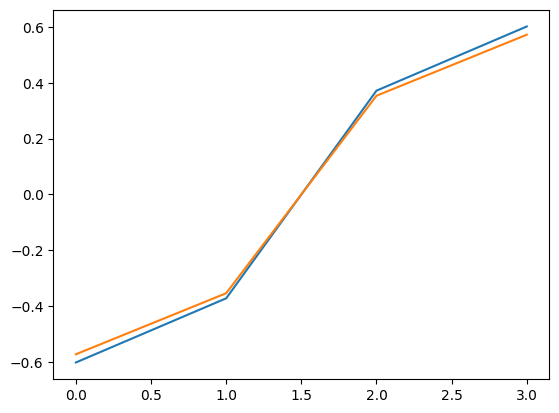

0.6015009550075456 0.6015009550075461 0.6015009550075453
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.60.


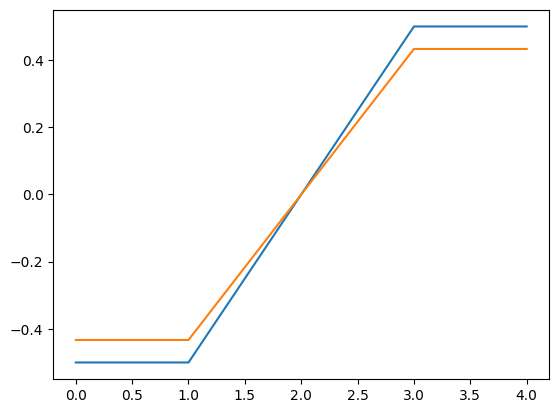

0.5773502691896256 0.5 0.5000000000000002
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


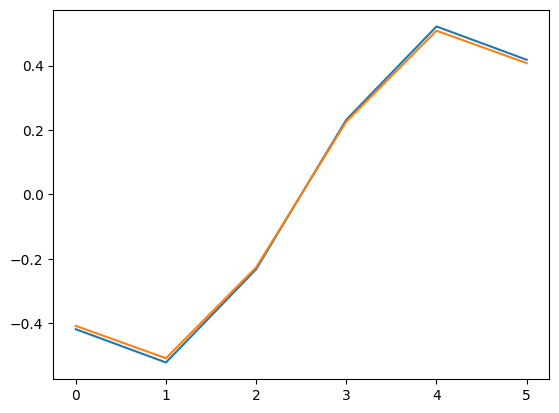

0.521120889169603 0.5211208891696003 0.5211208891696023
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.57.


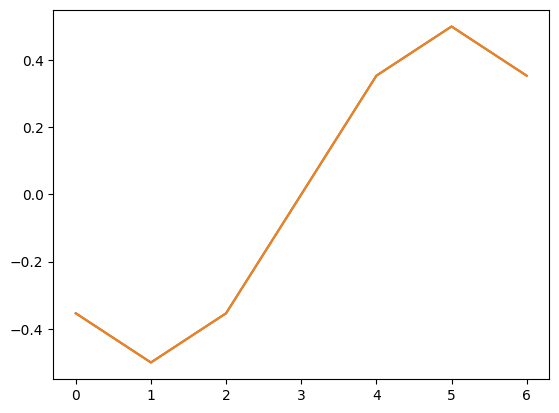

0.5000000000000017 0.49999999999999795 0.5000000000000002
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


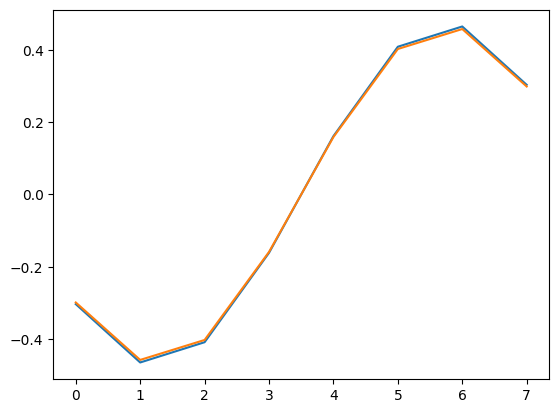

0.46424282688001456 0.4642428268800141 0.4642428268800125
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.56.


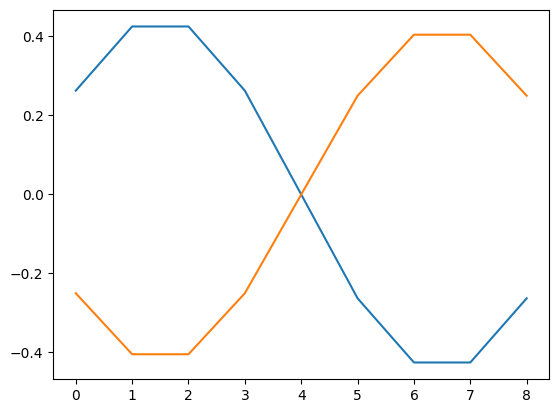

0.4472135954999571 0.425325404176021 0.42532540417602077
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


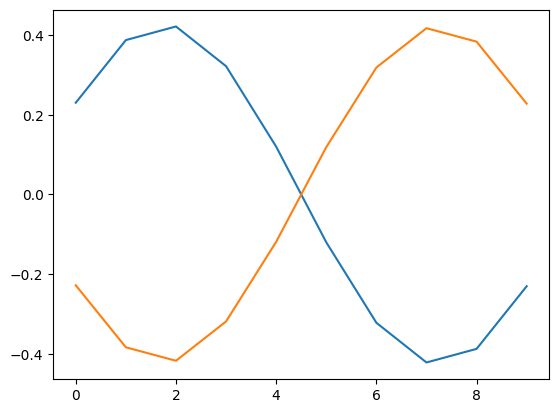

0.42206128094631834 0.4220612809463174 0.42206128094631606
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.55.


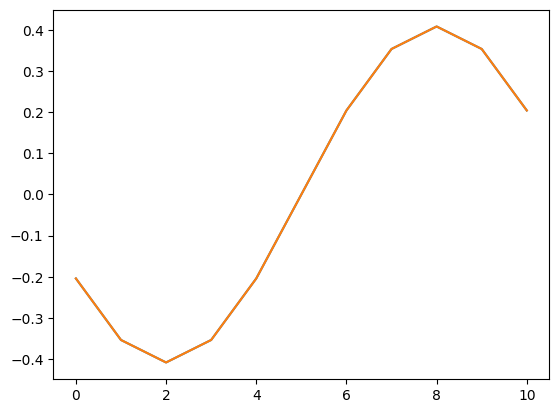

0.40824829046386324 0.40824829046386235 0.3943375672974065
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


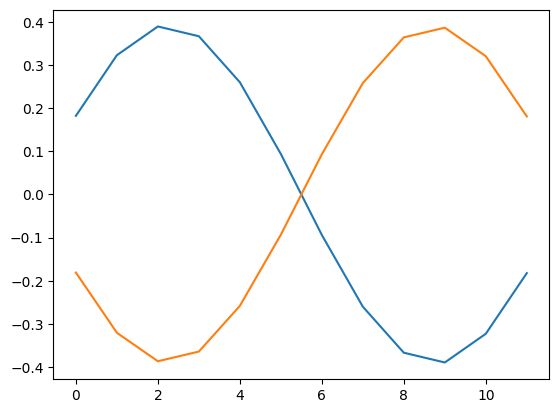

0.38937245541097804 0.38937245541097665 0.38937245541097676
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.54.


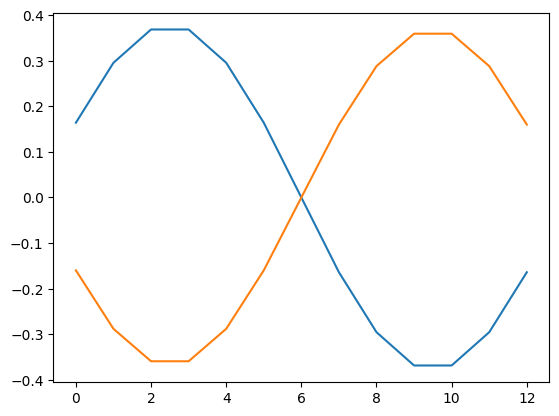

0.37796447300922786 0.36848811454979064 0.3779644730092275
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


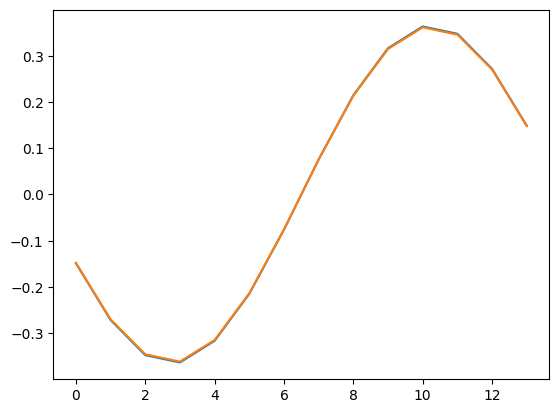

0.36314805068399864 0.3631480506840004 0.3631480506839967
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.53.


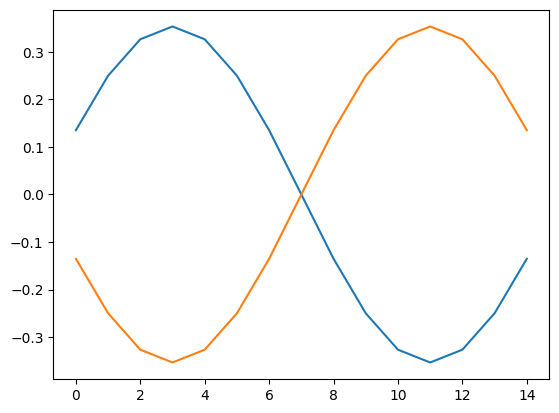

0.3535533905932733 0.3535533905932716 0.34675996133053705
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


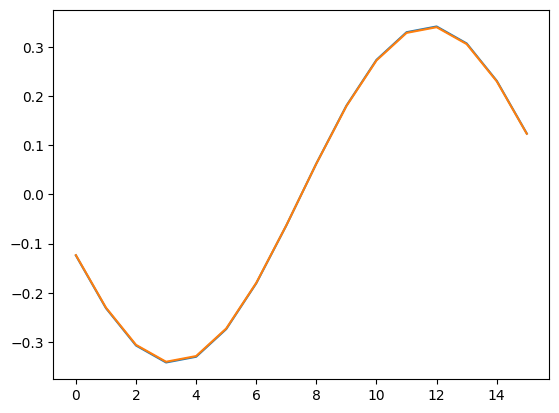

0.34153400482527957 0.34153400482527935 0.3415340048252798
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.53.


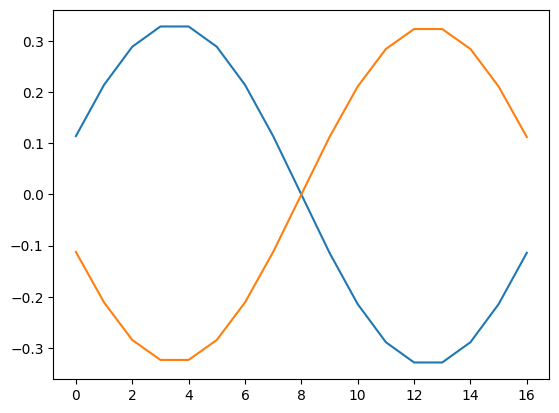

0.3333333333333314 0.32826925100406834 0.33333333333333287
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


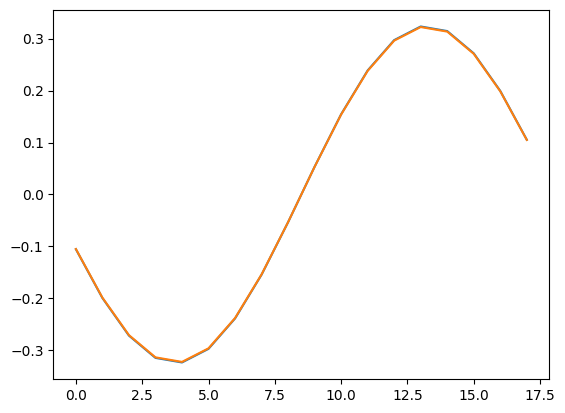

0.32333470546484083 0.3233347054648454 0.3233347054648449
Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.53.


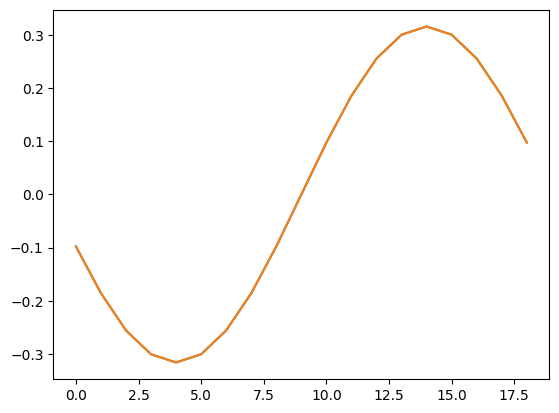

0.31622776601683533 0.3162277660168354 0.31233447746727877


In [134]:
for L in range(2, 20):
    l = Lattice2D(RectangularLatticeGeometry((L, 1)), SimulationParameters(t_hop=-1, E_amplitude=1, E_direction=np.array([0, -1]), h=1, T=1, substeps=1))
    state = l.energy_states[:, 1]
    plt.plot(state)
    x_values = np.arange(1, L+1)
    plt.plot(np.max(np.abs(state))*np.sin(-2*x_values*np.pi/(L+1)))
    plt.show()
    print(max(l.energy_states[:, 0]), max(l.energy_states[:, 1]), max(l.energy_states[:, L-1]))

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.52.


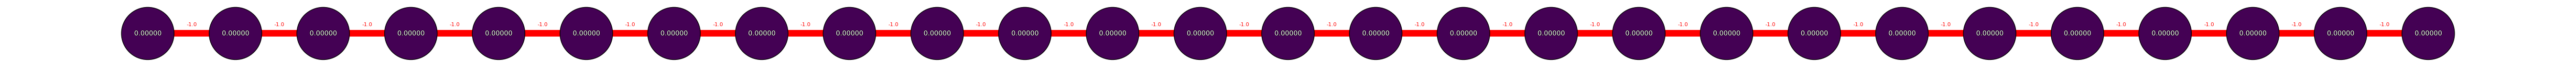

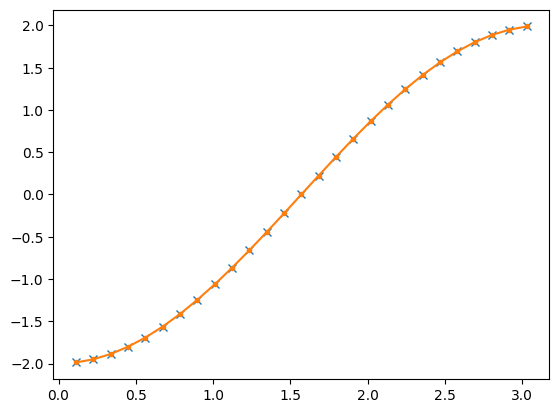

In [198]:
from lattice import plot_site_grid
from scipy.optimize import curve_fit

L = 27
l = Lattice2D(RectangularLatticeGeometry((L, 1)), SimulationParameters(t_hop=-1, E_amplitude=1, E_direction=np.array([0, -1]), h=1, T=1, substeps=1))
l.plot_hamiltonian()



E_k = dict()


for i in range(L):
    state = l.energy_states[:,i]
    freqs = np.fft.fftfreq(len(state))
    fft = np.fft.fft(state)

    # Find index of maximum amplitude in FFT
    max_idx = np.argmax(np.abs(fft))
    
    # Calculate another frequency by fitting sin(k*x) to the state
    
    # Define sine function to fit
    def sine_func(x, k, A):
        return np.max(np.abs(state)) * A * np.sin(k * x)
    
    # Use indices as x values
    x_values = np.arange(1, len(state)+1)
    
    # Initial guess for parameters
    # p0 = [2*np.pi*freqs[max_idx], np.max(np.abs(state))]
    p0 = [(i+1)*np.pi / (L+1) , -1]
    
    try:
        popt, pcov = curve_fit(sine_func, x_values, state.real, p0=p0, bounds=([-np.pi, -1], [np.pi, 1]))
        max_freq2 = abs(popt[0])/(2*np.pi)  # Convert angular frequency to frequency
        #print(f"FFT freq: {freqs[max_idx]}, Fitted freq: {max_freq2}, Fitted A: {popt[1]}")
    except:
        max_freq2 = freqs[max_idx]
        print("Fitting failed, using FFT frequency")
    max_freq = abs(freqs[max_idx])

    # print(max_freq, max_freq2, l.eigen_energies[i])

    if max_freq2 in E_k:
        print("!! Duplicate frequency")
        E_k[-max_freq2] = l.eigen_energies[i]
    else:
        E_k[max_freq2] = l.eigen_energies[i]

x = 2*np.pi*np.array(list(E_k.keys()))

plt.plot(x, list(E_k.values()), 'x')
y = -2 * np.cos(x)
plt.plot(x, y, '.-')
plt.show()

In [199]:
np.diff(x).mean()

np.float64(0.11219974447964637)

In [200]:
np.pi / (L+1)
# 1| 2| 3| 4| 5| 6| 7| 8| 0| -> block length pi / (L+1)

0.1121997376282069

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 1.00.


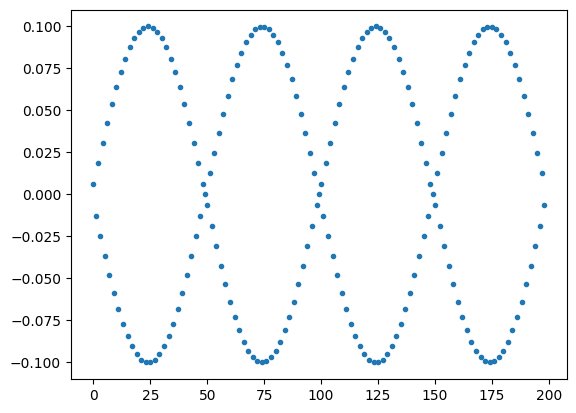

In [122]:
from lattice import plot_site_grid, Lattice2D, RectangularLatticeGeometry, SimulationParameters, BrickwallLatticeGeometry
import numpy as np
import matplotlib.pyplot as plt

phase = 1

# Initialize the lattice as in original code
L = 199
l = Lattice2D(RectangularLatticeGeometry((L, 1)), SimulationParameters(-1, 1, np.array([0, -1]), 1, 1, 1, 1, 1))

# get eigenstates
from scipy.linalg import eigh


eigen_energies, eigen_states = eigh(l.H_hop)

plt.plot(eigen_states[:,-4], '.')

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


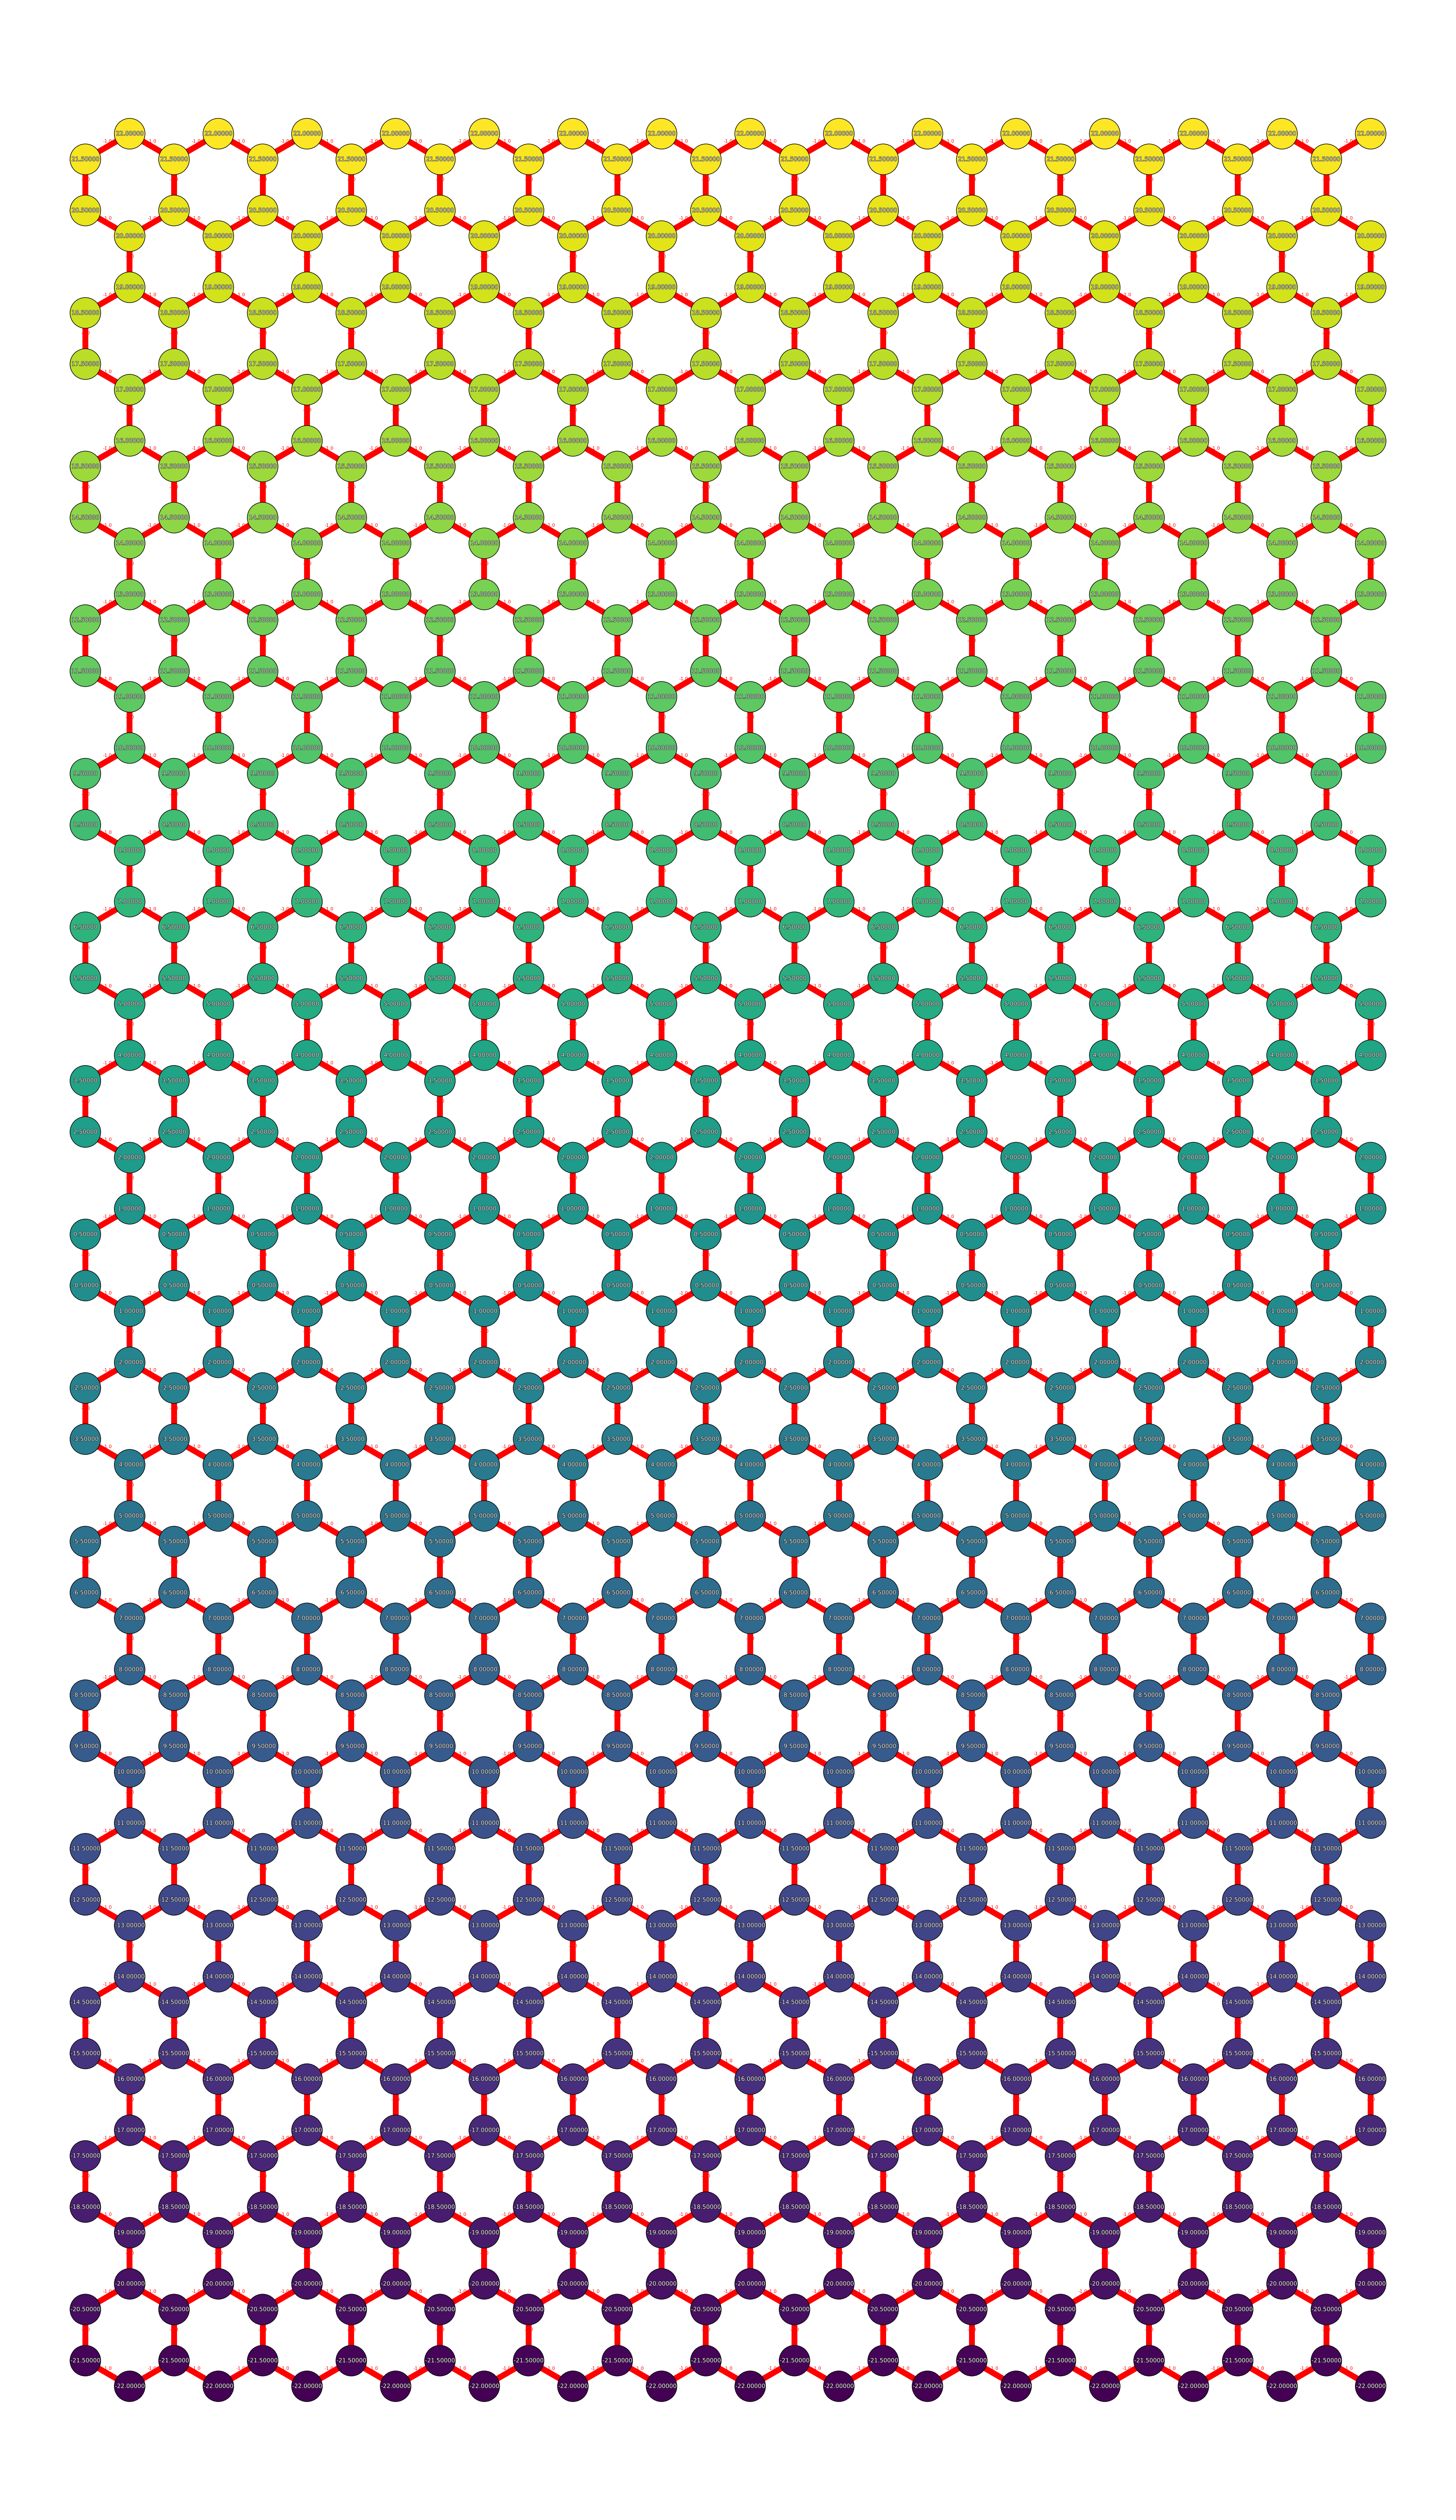

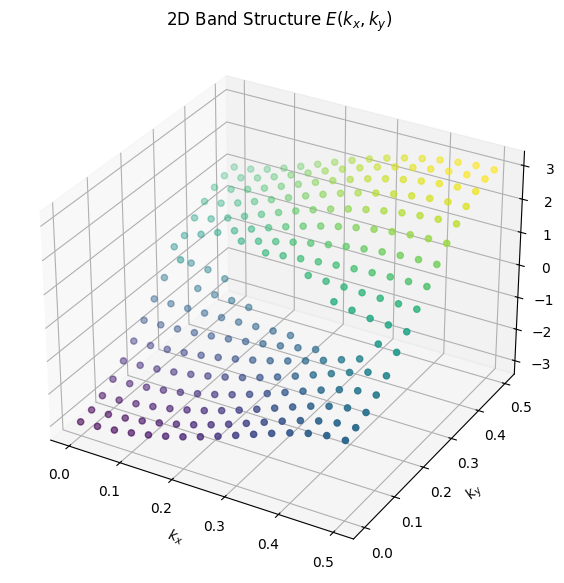

In [240]:
from lattice import plot_site_grid
import numpy as np
import matplotlib.pyplot as plt

# Define 2D lattice dimensions
Lx, Ly = 30, 30  # 2D lattice size

# Create 2D lattice
l = Lattice2D(
    HexagonalLatticeGeometry((Lx, Ly)), 
    SimulationParameters(t_hop=-1, E_amplitude=1, E_direction=np.array([0, -1]), h=1, T=1, substeps=1)
)

l.plot_hamiltonian()

# Dictionary to store E(kx, ky)
E_k = {}

# Loop over all eigenstates
for i in range(Lx * Ly):
    state = l.energy_states[:, i].reshape(Lx, Ly)  # Reshape to 2D grid
    fft2 = np.fft.fft2(state)  # Compute 2D FFT
    freqs_x = np.fft.fftfreq(Lx)
    freqs_y = np.fft.fftfreq(Ly)

    # Find index of maximum amplitude in FFT (dominant wavevector)
    max_idx = np.unravel_index(np.argmax(np.abs(fft2)), fft2.shape)
    kx, ky = abs(freqs_x[max_idx[0]]), abs(freqs_y[max_idx[1]])

    # Store energy
    E_k[(kx, ky)] = l.eigen_energies[i]

# Convert to arrays for plotting
kx_vals, ky_vals, E_vals = zip(*[(kx, ky, E) for (kx, ky), E in E_k.items()])

# Plot band structure E(kx, ky) in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kx_vals, ky_vals, E_vals, c=E_vals, cmap='viridis', marker='o')

ax.set_xlabel("$k_x$")
ax.set_ylabel("$k_y$")
ax.set_zlabel("Energy $E$")
ax.set_title("2D Band Structure $E(k_x, k_y)$")

plt.show()


# Discrete Momenta

## Visualize time evolution of excited momenta of rect lattice under pulse

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.40.


100%|██████████| 5000/5000 [00:01<00:00, 2947.33it/s]


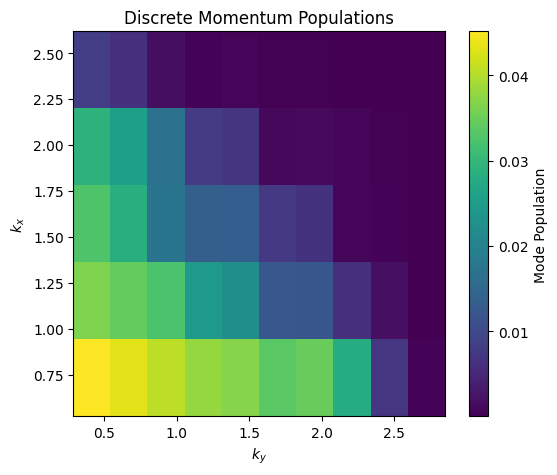

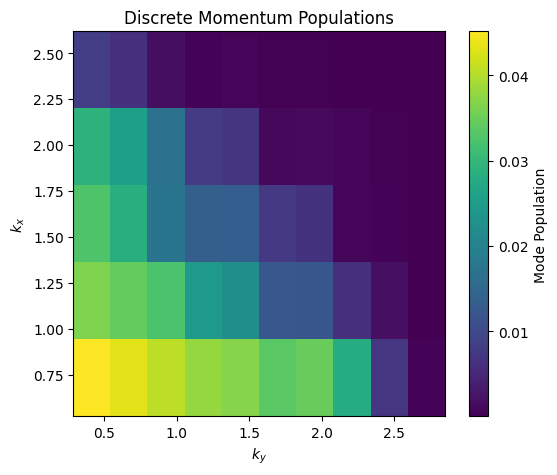

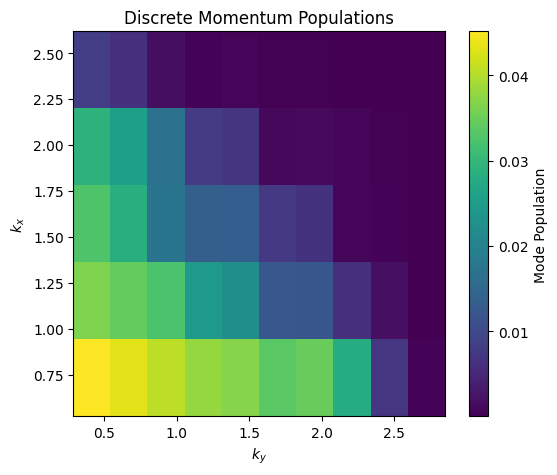

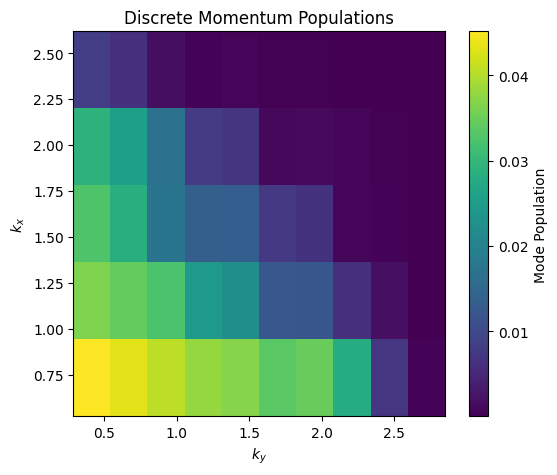

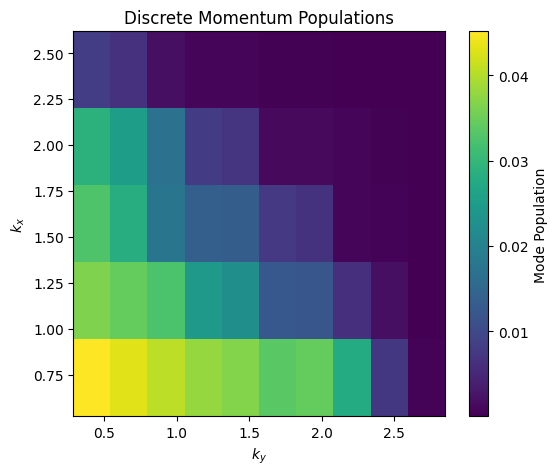

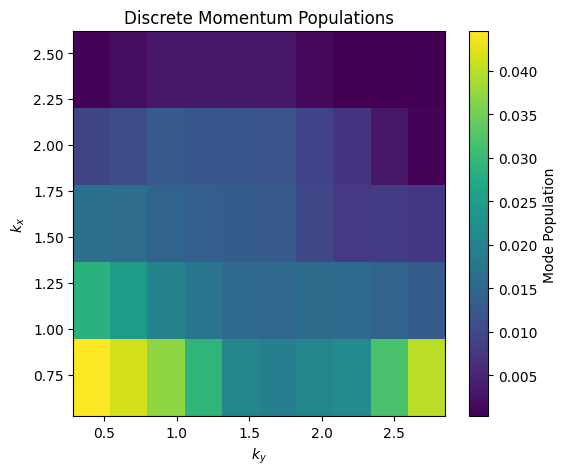

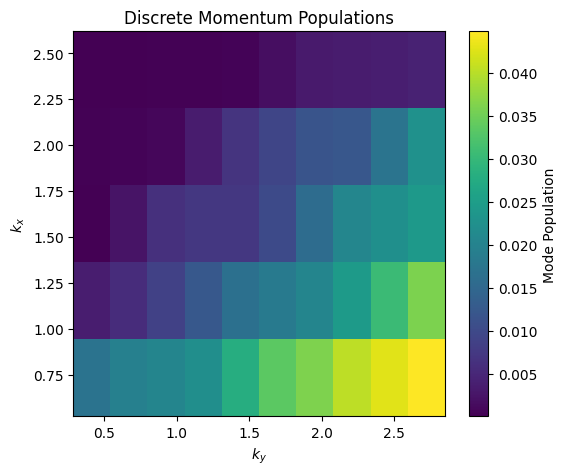

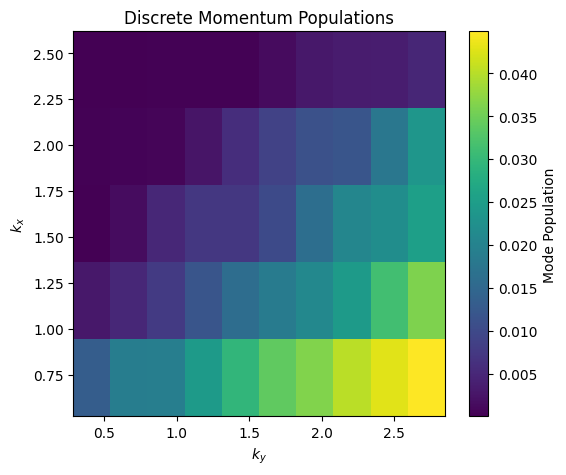

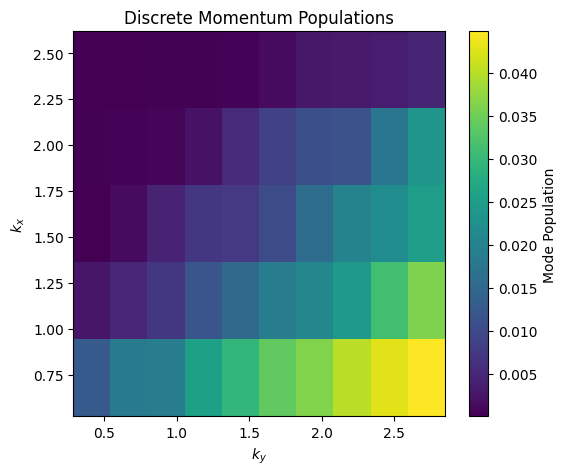

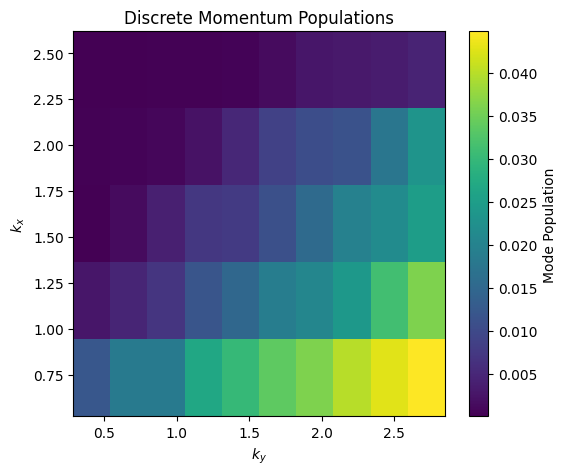

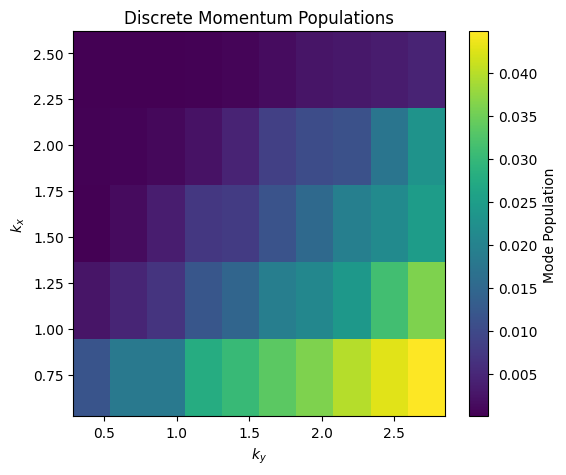

In [275]:
import numpy as np
import matplotlib.pyplot as plt

def E_pulse(t, t0, sigma):
    return 10*np.exp(-(t - t0)**2 / (2 * sigma**2))

# 1) Build a 1D lattice
Nx, Ny = 5, 10
l = Lattice2D(RectangularLatticeGeometry((Nx, Ny)),
              SimulationParameters(
                    t_hop=-1, E_amplitude=lambda t: E_pulse(t, 1, 0.1), E_direction=np.array([0, -1]),
                    h=0.2, T=2, substeps=500, initial_occupation=20/(Nx*Ny)))


l.evolve(solver="rk4")

# Get positions for all sites
N_sites = Nx*Ny
positions = np.array([l.geometry.site_to_position(i) for i in range(N_sites)])
x_positions = positions[:, 0]
y_positions = positions[:, 1]

kx_values = np.array([np.pi * n / (Nx+1) for n in range(1, Nx+1)])
ky_values = np.array([np.pi * m / (Ny+1) for m in range(1, Ny+1)])

# For each time step:
for state in l.states:
    rho_t = state.density  # density matrix (shape: N_sites x N_sites)
    
    # Initialize an array for mode populations in (kx, ky)
    P_k_discrete = np.zeros((Nx, Ny))
    
    # Loop over all discrete momentum indices:
    for i, kx in enumerate(kx_values):
        for j, ky in enumerate(ky_values):
            # Build the 2D sine basis function for this (kx, ky)
            # Evaluate phi(x,y) at each site:
            phi_k = np.sqrt(4/((Nx+1)*(Ny+1))) * np.sin(kx * x_positions) * np.sin(ky * y_positions)
            # Project onto this mode: <phi_k|rho|phi_k>
            P_k_discrete[i, j] = np.real(np.dot(phi_k.conj(), rho_t @ phi_k))
    
    # Now, plot the 2D momentum distribution:
    plt.figure(figsize=(6,5))
    plt.imshow(P_k_discrete, origin='lower', 
               extent=(ky_values[0], ky_values[-1], kx_values[0], kx_values[-1]),
               aspect='auto', interpolation='none')
    plt.colorbar(label='Mode Population')
    plt.xlabel('$k_y$')
    plt.ylabel('$k_x$')
    plt.title('Discrete Momentum Populations')
    plt.show()


## visualize min exciting pulses for 1d chain

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.10.


100%|██████████| 5000/5000 [00:01<00:00, 4331.62it/s]


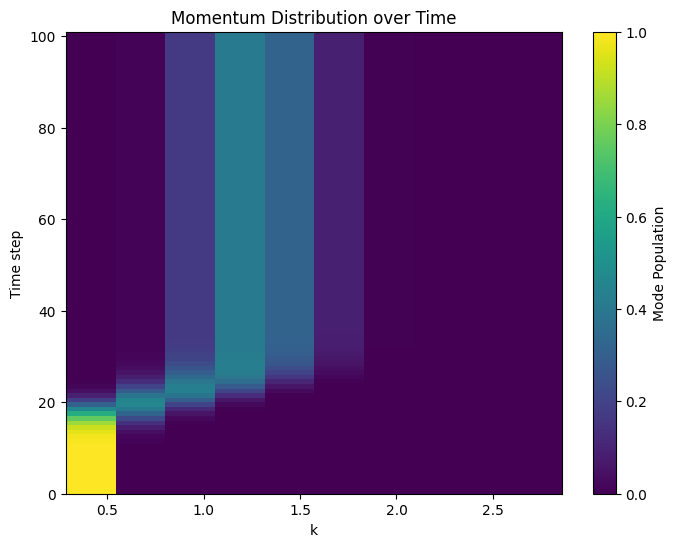

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def E_pulse(t, t0, sigma, A):
    return A*np.exp(-(t - t0)**2 / (2 * sigma**2))

# 1) Build a 1D lattice
Nx, Ny = 10, 1

l = Lattice2D(RectangularLatticeGeometry((Nx, Ny)),
              SimulationParameters(
                    t_hop=-1, E_amplitude=lambda t: E_pulse(t, 2, 0.5, 1), E_direction=np.array([1, 0]),
                    h=0.1, T=10, substeps=50, initial_occupation=1/(Nx*Ny)))

l.evolve(solver="rk4")

N = l.N  # total number of sites in the 1D lattice
x = np.arange(1, N+1)   # site 

# Allowed discrete momenta for a 1D lattice with open boundaries:
# k_n = n*pi/(N+1), with n=1,...,N.
k_list = np.array([np.pi * n / (N+1) for n in range(1, N+1)])

# We'll store the momentum distribution for each time step:
momentum_distributions = []

# Loop over time steps:
for state in l.states:
    rho_t = state.density  # Density matrix for current time step (N x N array)
    P_k = np.zeros(N)
    for idx, k in enumerate(k_list):
        # Construct the 1D sine basis function for momentum k:
        phi_k = np.sqrt(2/(N+1)) * np.sin(k * x)
        # Projection: <phi_k|rho|phi_k>
        P_k[idx] = np.real(np.dot(phi_k.conj(), rho_t @ phi_k))
    momentum_distributions.append(P_k)

# Convert list to array for plotting: shape (n_timesteps, N)
momentum_distributions = np.array(momentum_distributions)

plt.figure(figsize=(8, 6))
plt.imshow(momentum_distributions, aspect='auto', origin='lower',
           extent=[k_list[0], k_list[-1], 0, momentum_distributions.shape[0]]
           )
plt.xlabel("k")
plt.ylabel("Time step")
plt.title("Momentum Distribution over Time")
plt.colorbar(label="Mode Population")
plt.show()


In [83]:
sum(momentum_distributions[40])

np.float64(0.9999999999999996)

### below plot shows very strong, long pulse

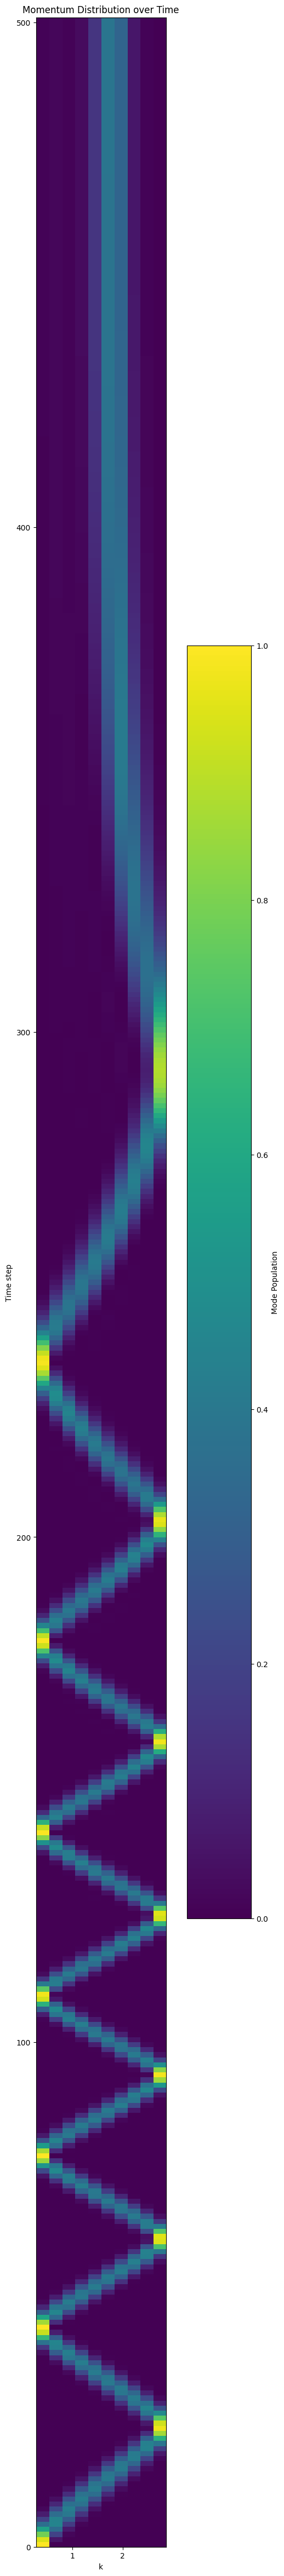

In [19]:
plt.figure(figsize=(10, 60))
plt.imshow(momentum_distributions, aspect=0.1, origin='lower',
           extent=[k_list[0], k_list[-1], 0, momentum_distributions.shape[0]], interpolation='none'
           )
plt.xlabel("k")
plt.ylabel("Time step")
plt.title("Momentum Distribution over Time")
plt.colorbar(label="Mode Population")
plt.show()

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.01.


100%|██████████| 1000/1000 [00:00<00:00, 1352.42it/s]


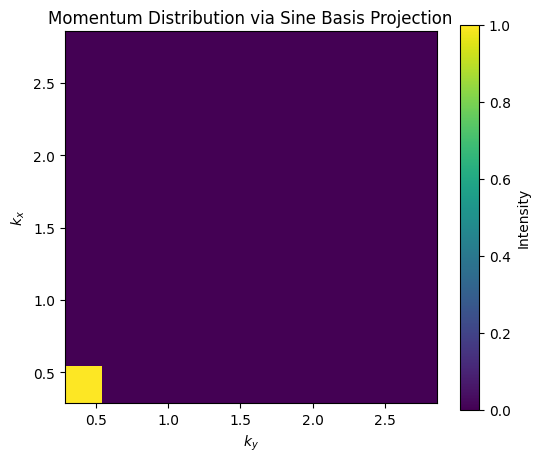

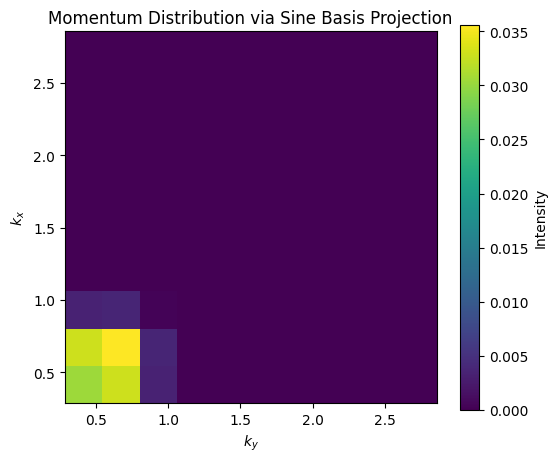

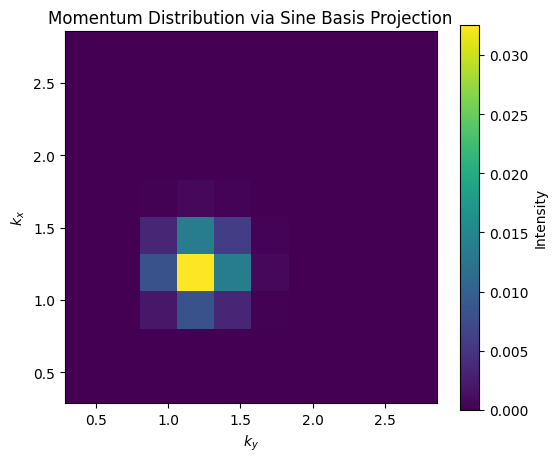

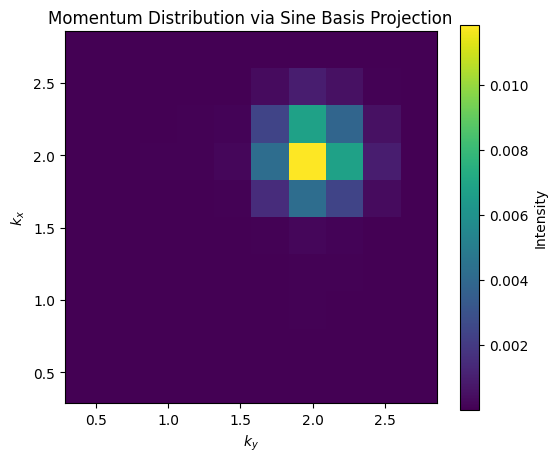

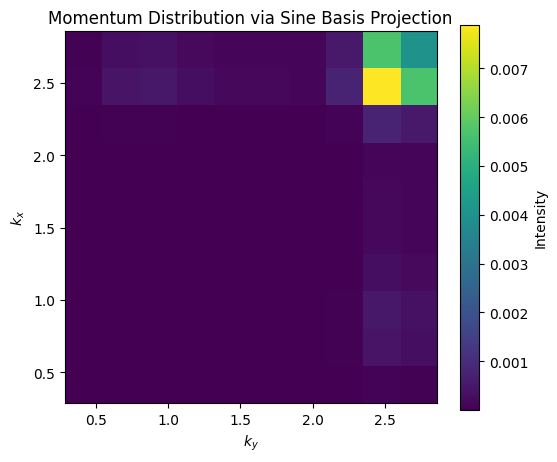

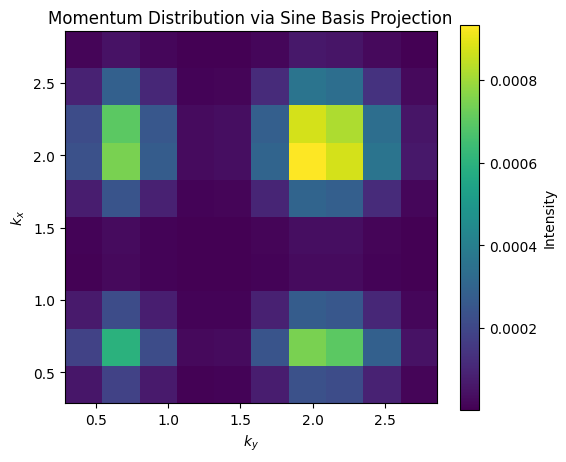

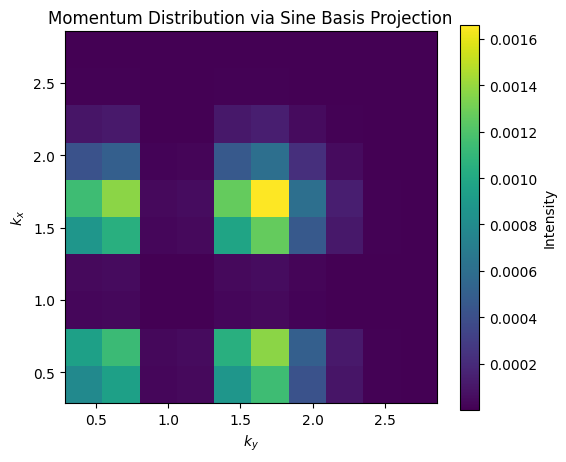

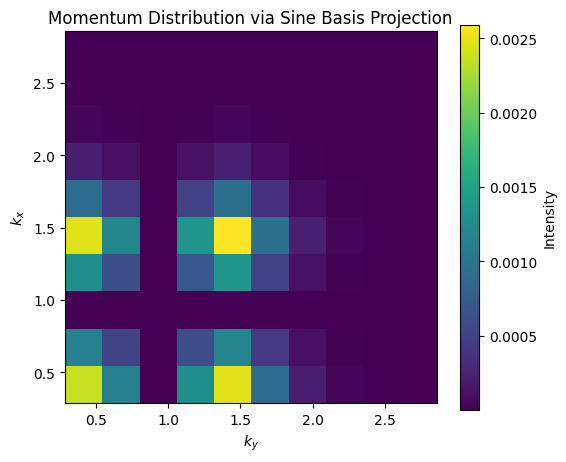

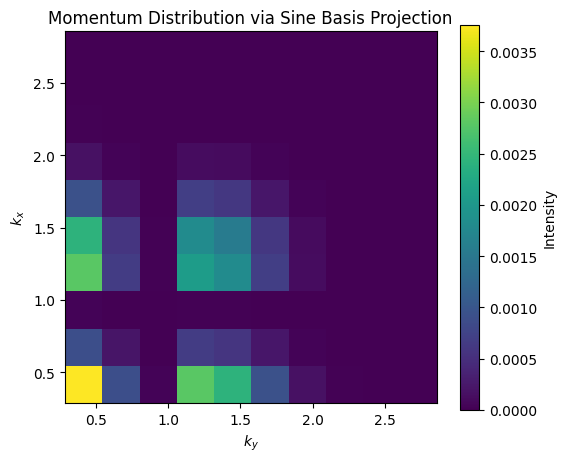

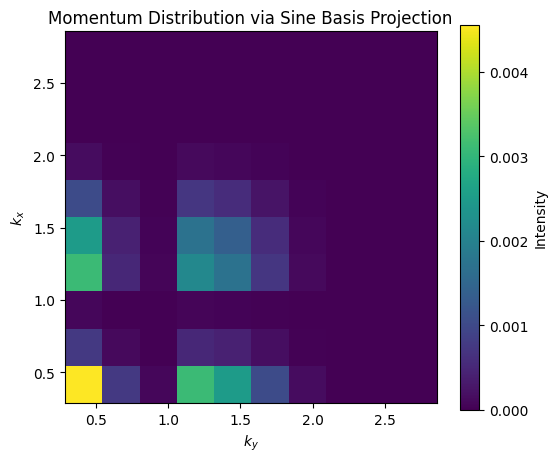

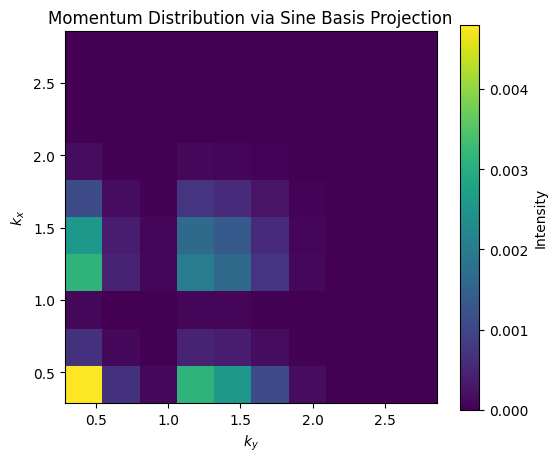

In [217]:
Nx, Ny = 10, 10
l = Lattice2D(
    RectangularLatticeGeometry((Nx, Ny)),
    SimulationParameters(
        t_hop=-1,
        E_amplitude=lambda t: E_pulse(t, 3, 2, 1),
        E_direction=np.array([1, -1]),
        h=1, T=10, substeps=100,
        initial_occupation=1/(Nx*Ny)
    )
)

l.evolve(solver="rk4")

for state in l.states:
    rho_t = state.density  # shape (N_sites, N_sites)
    N_sites = l.N

    # Get positions of sites (assumed to be arranged on a rectangular grid)
    positions = np.array([l.geometry.site_to_position(i) for i in range(N_sites)])
    # Extract unique x and y coordinates (assumes lattice is rectangular)
    x_unique, x_inv = np.unique(positions[:,0], return_inverse=True)
    y_unique, y_inv = np.unique(positions[:,1], return_inverse=True)
    Nx_sites = len(x_unique)
    Ny_sites = len(y_unique)

    # Build the sine basis projection for open boundaries.
    # For x-direction: allowed momenta k_x = n*pi/(Nx_sites+1), n = 1,...,Nx_sites.
    # For y-direction: allowed momenta k_y = m*pi/(Ny_sites+1), m = 1,...,Ny_sites.
    P_modes = np.zeros((Nx_sites, Ny_sites), dtype=complex)

    # Loop over the allowed mode indices:
    for n in range(1, Nx_sites+1):
        for m in range(1, Ny_sites+1):
            # Build the product sine basis function.
            # Note: x_inv and y_inv give indices from 0 to (Nx_sites-1) and (Ny_sites-1),
            # so add 1 to get indices 1...Nx_sites, 1...Ny_sites.
            phi_x = np.sqrt(2/(Nx_sites+1)) * np.sin(np.pi * n * (x_inv + 1) / (Nx_sites+1))
            phi_y = np.sqrt(2/(Ny_sites+1)) * np.sin(np.pi * m * (y_inv + 1) / (Ny_sites+1))
            phi_nm = phi_x * phi_y  # shape (N_sites,)
            
            # Project the density matrix onto the (n,m) mode:
            P_modes[n-1, m-1] = np.dot(phi_nm.conjugate(), np.dot(rho_t, phi_nm))

    # Define the allowed momentum values:
    kx_modes = np.array([np.pi * n / (Nx_sites+1) for n in range(1, Nx_sites+1)])
    ky_modes = np.array([np.pi * m / (Ny_sites+1) for m in range(1, Ny_sites+1)])

    # Plot the mode intensity |P_modes|^2 as a function of (k_x, k_y)
    plt.figure(figsize=(6,5))
    plt.imshow(np.abs(P_modes)**2, origin='lower', aspect=Nx/Ny,
            extent=[ky_modes[0], ky_modes[-1], kx_modes[0], kx_modes[-1]])
    plt.xlabel('$k_y$')
    plt.ylabel('$k_x$')
    plt.colorbar(label='Intensity')
    plt.title('Momentum Distribution via Sine Basis Projection')
    plt.show()
